<a href="https://colab.research.google.com/github/LourdesNajarro/Lab01---SP1/blob/main/SP1_Laboratory_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Lourdes María Najarro
Carnet: 22000795

## Preparations

In [1]:
# ----- Libraries ----- #

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf

# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

# For dataset manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# For visualizing more complex graphs
import seaborn as sns

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

# Regression


## 1) Dataset Preparations

In [19]:
'''
The dataset you are going to use is the following:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG
'''

# Retrieve the dataset
# /* YOUR CODE HERE */
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

--2025-02-20 20:45:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘auto-mpg.data’

auto-mpg.data           [ <=>                ]  29.58K  --.-KB/s    in 0.01s   

2025-02-20 20:45:05 (3.03 MB/s) - ‘auto-mpg.data’ saved [30286]



In [20]:
# Loading Dataset and have a glimpse about it
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model_Year', 'Origin']

# /* YOUR CODE HERE */
# Hint: Make sure to check out the files first! And pay attention how data is separated
raw_dataset = pd.read_csv(dataset_url, names=column_names, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)


# Brief Statistical Summary of the dataset
raw_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [21]:
# Lets check columns
raw_dataset.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model_Year', 'Origin'],
      dtype='object')

In [22]:
# Summary of the dataset
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [23]:
# Returns a form of (# rows, # columns)
raw_dataset.shape

(398, 8)

In [24]:
# Lets make a copy
new_dataset = raw_dataset.copy()

# Lets check for null values
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model_Year      0
Origin          0
dtype: int64


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


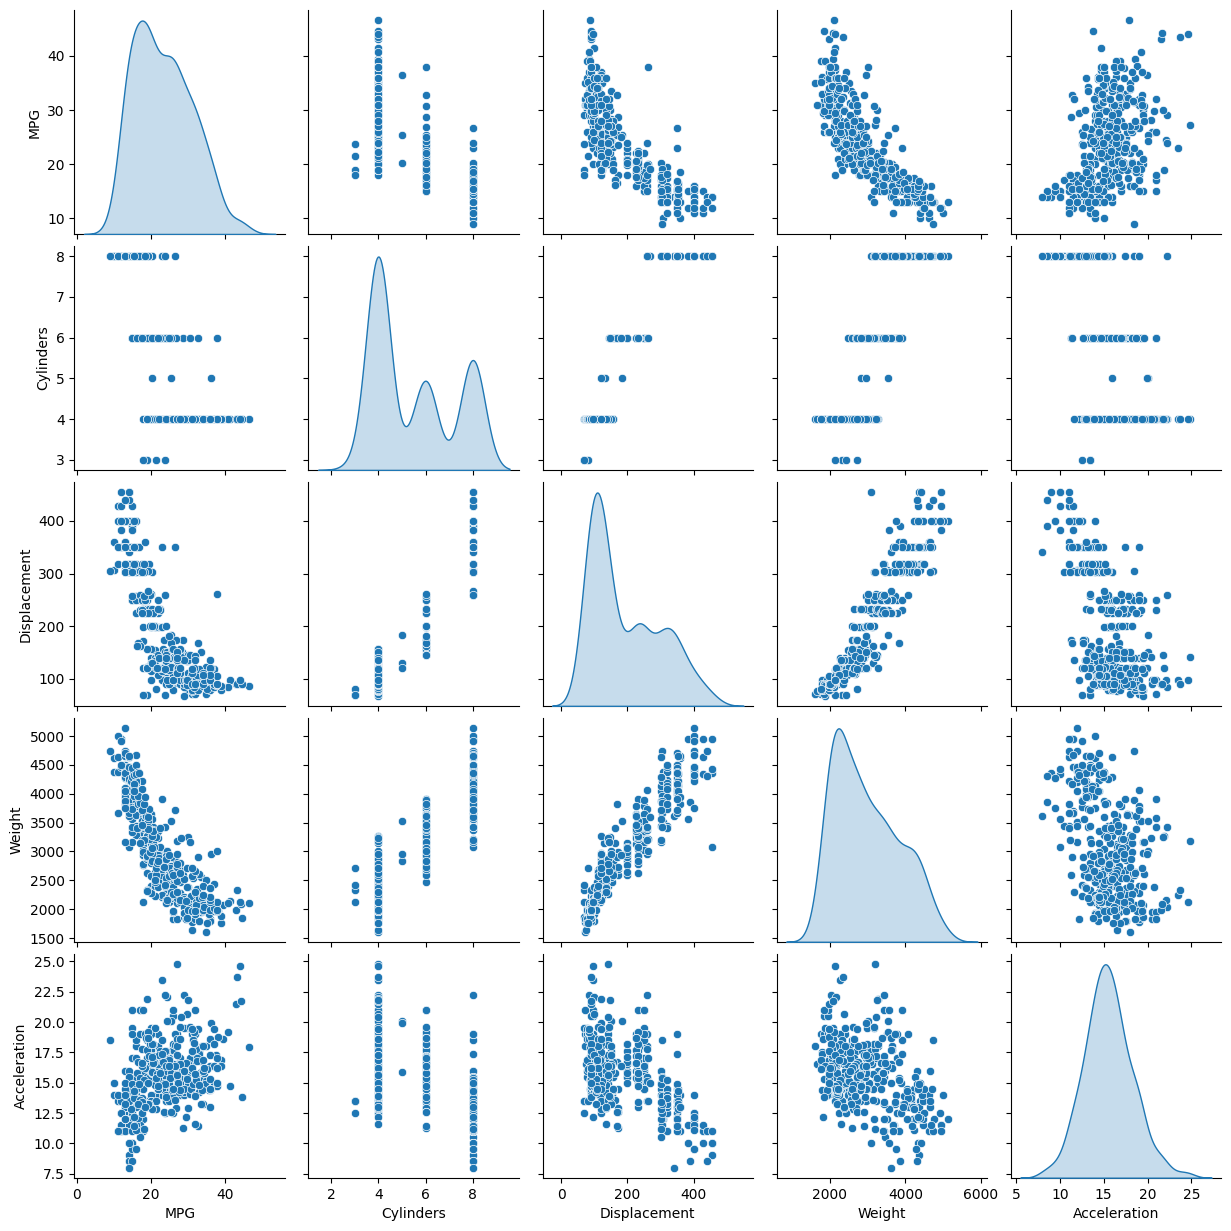

In [25]:
# Lets visualize the data

# /* YOUR CODE HERE*/
sns.pairplot(new_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight', 'Acceleration']], diag_kind='kde')
plt.show()
# Hint: Choose 5 NUMERICAL variables

## 2) NN for a simple Regression

In [26]:
# Splitting dataset into training and testing
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables

# /* REPLACE 'None' WITH CODE YOUR CODE */
# Hint: Make sure you select only numerical variables.
# Feel free to choose the number of independent variables
# you want and the dependent variable is MPG
independent_variables = ['Cylinders', 'Displacement', 'Weight', 'Acceleration']
dependent_variables = 'MPG'

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [30]:
# Build your model!
# /* YOUR CODE HERE */
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(len(independent_variables),)),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),

  # Last layer of the model and its activation function decide if it is a regression or classification problem!
  tf.keras.layers.Dense(units=len(dependent_variables), activation='relu'),
  ])
# Now compile the model!
# /* YOUR CODE HERE */
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [31]:
# Now lets train the model!
# Hint: Feel free to change a few parameters
model.fit(train_set,
          train_target,
          epochs=15,
          batch_size = 128,
          validation_split=0.2
        )

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - loss: 38859.6680 - mae: 123.4675 - val_loss: 28608.1250 - val_mae: 108.8349
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 32026.7754 - mae: 113.1433 - val_loss: 22956.8047 - val_mae: 98.9121
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 25475.5820 - mae: 102.1573 - val_loss: 18001.6152 - val_mae: 89.1228
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 20064.5254 - mae: 92.2585 - val_loss: 13736.2842 - val_mae: 79.5128
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 15130.1504 - mae: 81.8616 - val_loss: 10154.4678 - val_mae: 70.1582
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11071.2188 - mae: 71.7730 - val_loss: 7229.0332 - val_mae: 61.1235
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 7816.7729 - mae: 62.1255 - val_loss: 4921.4956 - val_mae: 52.4808
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 5411.1738 - mae: 53.4393 - val_loss: 3178.3669 - val_mae: 44.2937


In [32]:
# Evaluate your model
model.evaluate(x=test_set, y=test_target, batch_size=128)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 573.8430 - mae: 22.8494


[573.8429565429688, 22.849367141723633]

# Classification

## 1) Dataset Preparations

In [33]:
'''
The dataset you are going to use is the following:
https://archive.ics.uci.edu/ml/datasets/Ecoli
'''

# Retrieve the dataset
# /* YOUR CODE HERE */
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data"

--2025-02-20 20:53:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘ecoli.data’

ecoli.data              [ <=>                ]  19.03K  --.-KB/s    in 0.02s   

2025-02-20 20:53:29 (1.11 MB/s) - ‘ecoli.data’ saved [19488]



In [ ]:
# Loading Dataset and have a glimpse about it
column_names = ['name','MCG','GVH','LIP', 'CHG', 'AAC', 'AML1', 'ALM2', 'class']

# /* YOUR CODE HERE */
# Hint: Make sure to check out the files first! And pay attention how data is separated

# Brief Statistical Summary of the dataset
raw_dataset.describe()

In [ ]:
# Lets check columns
raw_dataset.columns

In [ ]:
# Summary of the dataset
raw_dataset.head()

In [ ]:
# Returns a form of (# rows, # columns)
raw_dataset.shape

In [ ]:
# Lets make a copy
new_dataset = raw_dataset.copy()

# Lets check for null values
# df.dropna()
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()

In [ ]:
# Lets visualize the data

# /* YOUR CODE HERE*/
# Hint: Choose 5 NUMERICAL variables

In [ ]:
# Splitting dataset into training and testing
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables

# /* REPLACE 'None' WITH CODE YOUR CODE */
# Hint: Make sure you select only numerical variables.
# Feel free to choose the number you want and the dependent variables is MPG
independent_variables = None
dependent_variables = None

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [ ]:
train_target, test_target

In [ ]:
# NNs can't understand strings, we have to ENCODE them! (more next class)
train_target = pd.factorize(train_target['class'])[0]
test_target = pd.factorize(test_target['class'])[0]

## 2) NN for Classification

In [ ]:
# Build your model!
# /* YOUR CODE HERE */
# Hint: Is this a binary or multiclassification problem?

# Now compile the model!
# /* YOUR CODE HERE */

In [ ]:
# Evaluate your model
model.evaluate(x=test_set, y=test_target, batch_size=128)

In [ ]:
# Function that plots confusion matrix
def plot_confusion_matrix(labels, predictions):
  figure = plt.figure(figsize=(4, 4))
  sns.heatmap(confusion_matrix(labels=labels, predictions=predictions), annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Confusion Matrix
predictions = list(map(lambda x: np.argmax(x), model.predict(test_set)))

plot_confusion_matrix(labels=test_target, predictions=predictions)

# Conclusiones

After you are done with both previous models, make 3 different models for the regression problem and 3 for the classification problem.

Annotate the results in a Text Cell below this one (only the metrics shown in the evaluation phase) and then write a conclusion which model was the best for each problem.

# READ ME

When you are finished with your laboratory, remember to share it. Make the URL public for Galileo.edu domain or for everyone.
Also, remember to hit Ctrl+S to save your progress.